<a href="https://colab.research.google.com/github/Alex-Witt/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [5]:
lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head(10)   

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [6]:
df.heights.mean()

69.6

In [0]:
import random
random.seed(10)

In [8]:
population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  
print(population)
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [9]:
sample = random.sample(population, 100)
print(len(sample))

100


In [10]:
df = pd.DataFrame({'likes_coke': sample})

df.head()

,likes_coke
0,0
1,0
2,0
3,0
4,1


In [11]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average

print('Population Mean:' , mean(population))
print('Sample Mean:' , mean(sample))




Population Mean: 0.507
Sample Mean: 0.46


In [12]:
def variance(list):
  return np.sum((list - mean(list))**2)/len(list)
  
print(variance(df.likes_coke))
df.likes_coke.var()

0.24839999999999995


0.250909090909091

In [13]:
def stddev(list):
  var = variance(list)
  print(var)
  return var**(1/2)

stddev(df.likes_coke)

0.24839999999999995


0.49839743177508444

In [14]:
df.likes_coke.mean()

0.46

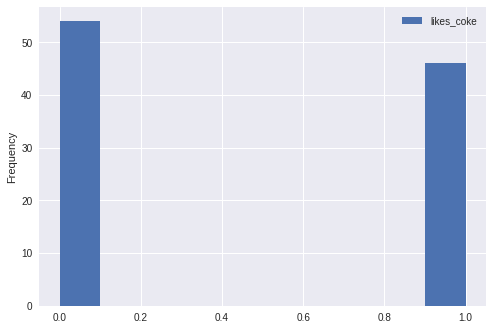

In [15]:
df.plot.hist();

In [16]:
t_stat = ((mean(df.likes_coke) - mean(population))  / 
          (stddev(df.likes_coke) / len(df.likes_coke)**(1/2)))

0.24839999999999995


In [17]:
stats.ttest_1samp(df['likes_coke'], .5)

Ttest_1sampResult(statistic=-0.7985494095046901, pvalue=0.4264632540527489)

In [18]:
mean(df.likes_coke)

0.46

### t-Test

\begin{align}
t = \frac{\text{variance between groups}}{\text{variance within groups}}
\end{align}


### P-Value

P-value is a threshold that we set for ourselves to denote "statistical significance" Statistical Significance means - the odds of me getting unlucky that I'm willing to deal with. The probability that I would have to see that says that these two differences are not just due to chance. 

5% - Will only accept this result as reliable or significant if I calculate that this outcome has a 5% chance or less of happening just due to chance.

The probability that the pattern in our data that we're seeing could be produced by random data.

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

### Data Set Information:

This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).


Attribute Information:

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)

In [19]:
df = pd.read_csv('https://www.dropbox.com/s/eykydmqlt003trd/house-votes-84.data?dl=1', 
                 na_values = ['?'] , 
                 header = None,
                 names = ['Party','handicapped-infants','water',
                          'budget','health_costs',
                          'el_salvador','religious_groups_in_school','anti_satellite_wep',
                          'contra','mx_missile','immigration',
                          'synfuel','education',
                          'superfund','crime','duty_free_export',
                          'south_africa'])

print(df.shape)
print()
print(df.info())
print()
print(df.isnull().sum())
print()
df.head()

(435, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Party                         435 non-null object
handicapped-infants           423 non-null object
water                         387 non-null object
budget                        424 non-null object
health_costs                  424 non-null object
el_salvador                   420 non-null object
religious_groups_in_school    424 non-null object
anti_satellite_wep            421 non-null object
contra                        420 non-null object
mx_missile                    413 non-null object
immigration                   428 non-null object
synfuel                       414 non-null object
education                     404 non-null object
superfund                     410 non-null object
crime                         418 non-null object
duty_free_export              407 non-null object
south_africa                  331 non-null object
dtypes: object(17)
memory usage: 5

,Party,handicapped-infants,water,budget,health_costs,el_salvador,religious_groups_in_school,anti_satellite_wep,contra,mx_missile,immigration,synfuel,education,superfund,crime,duty_free_export,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [20]:
# First I want to replace the strings with ints 1 and 2. This will act as a Boolean allow me to do stats. 

df = df.replace({'n': 0 , 'y': 1})

df.describe()

,handicapped-infants,water,budget,health_costs,el_salvador,religious_groups_in_school,anti_satellite_wep,contra,mx_missile,immigration,synfuel,education,superfund,crime,duty_free_export,south_africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
dem = df.loc[df['Party'] == 'democrat']
rep = df.loc[df['Party'] == 'republican']

### Democrat Supported Bill

In [61]:
print("Democrats Strongly Support the Budget Bill")
print(stats.ttest_1samp(dem['budget'],df['budget'].mean(), nan_policy = 'omit'))
print()
print("Republicans Strongly Oppose the Budget Bill")
print(stats.ttest_1samp(rep['budget'],df['budget'].mean(), nan_policy = 'omit'))
print()
print("Compared to the Republicans, the Democrats Support the Budget Bill more.")
stats.ttest_ind(dem['budget'], rep['budget'], equal_var = False, nan_policy = 'omit')

Democrats Strongly Support the Budget Bill
Ttest_1sampResult(statistic=14.915887186469684, pvalue=9.740949806824692e-37)

Republicans Strongly Oppose the Budget Bill
Ttest_1sampResult(statistic=-17.327762488482595, pvalue=8.263376533008978e-39)

Compared to the Republicans, the Democrats Support the Budget Bill more.


Ttest_indResult(statistic=22.79324627068853, pvalue=1.9467037396514675e-69)

In [63]:
#Proof!

print("Democrat Support")
print(dem['budget'].value_counts())
print()
print('Republican Support')
print(rep['budget'].value_counts())

Democrat Support
1.0    231
0.0     29
Name: budget, dtype: int64

Republican Support
0.0    142
1.0     22
Name: budget, dtype: int64


### Republican Supported Bill

In [49]:
print("Republicans Strongly Support the Education Bill")
print(stats.ttest_1samp(rep['education'],df['education'].mean(), nan_policy = 'omit'))
print()
print("Democrats Strongly Oppose the Education Bill")
print(stats.ttest_1samp(dem['education'],df['education'].mean(), nan_policy = 'omit'))
print()
print("Compared to the Democratcs, the Republicans Support the Education Bill more.")
stats.ttest_ind(rep['education'], dem['education'], equal_var = False, nan_policy = 'omit')

Republicans Strongly Support the Education Bill
Ttest_1sampResult(statistic=16.5728680904796, pvalue=4.666455178438756e-36)

Democrats Strongly Oppose the Education Bill
Ttest_1sampResult(statistic=-12.479695350133682, pvalue=4.60697510595166e-28)

Compared to the Democratcs, the Republicans Support the Education Bill more.


Ttest_indResult(statistic=20.724815686746847, pvalue=3.568750766339715e-62)

In [59]:
#Proof!

print("Democrat Support")
print(dem['education'].value_counts())
print()
print('Republican Support')
print(rep['education'].value_counts())

Democrat Support
0.0    213
1.0     36
Name: education, dtype: int64

Republican Support
1.0    135
0.0     20
Name: education, dtype: int64


### Republicans and Democrats Agree on Something!!!!!

In [66]:
print("Republicans are up in the air regarding the Water Project Cost Sharing Bill")
print(stats.ttest_1samp(rep['water'],df['water'].mean(), nan_policy = 'omit'))
print()
print("Democrats are up in the air regarding the Water Project Cost Sharing Bill")
print(stats.ttest_1samp(dem['water'],df['water'].mean(), nan_policy = 'omit'))
print()
print("I think we found a bipartisan issue!!!!!")
stats.ttest_ind(rep['water'], dem['water'], equal_var = False, nan_policy = 'omit')

Republicans are up in the air regarding the Water Project Cost Sharing Bill
Ttest_1sampResult(statistic=0.06986177003179972, pvalue=0.9443986292695835)

Democrats are up in the air regarding the Water Project Cost Sharing Bill
Ttest_1sampResult(statistic=-0.0550423989771089, pvalue=0.9561508625614766)

I think we found a bipartisan issue!!!!!


Ttest_indResult(statistic=0.08893998898558053, pvalue=0.9291867875225105)

In [67]:
#Proof!

print("Democrat Support")
print(dem['water'].value_counts())
print()
print('Republican Support')
print(rep['water'].value_counts())

Democrat Support
1.0    120
0.0    119
Name: water, dtype: int64

Republican Support
1.0    75
0.0    73
Name: water, dtype: int64


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars